<a href="https://colab.research.google.com/github/OmidOstovar/MLNotebooks/blob/master/Copy_of_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/'

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/train_dataset (1).csv')
df.columns
df.head()
#df.shape

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,-1.0,-1,2020-08-04 04:07:56,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,-1,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,-1.0,-1,2020-08-04 01:47:40,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,-1.0,-1,2020-08-04 16:54:31,-1,0.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,-1,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,-1,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,-1.0,-1,2020-08-03 20:34:28,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,-1,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,-1.0,-1,2020-08-03 20:54:17,1064,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,-1,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33


In [ ]:
df.dtypes
df.nunique(axis=0)

Sale                             2
SalesAmountInEuro             8932
time_delay_for_conversion     9208
click_timestamp              67045
nb_clicks_1week               1138
product_price                 4496
product_age_group                9
device_type                      4
audience_id                   3182
product_gender                  11
product_brand                 4770
product_category(1)             22
product_category(2)            145
product_category(3)            699
product_category(4)            910
product_category(5)            442
product_category(6)             89
product_category(7)              1
product_country                 17
product_id                   45447
product_title                27695
partner_id                     183
user_id                      96766
dtype: int64

In [ ]:
df.describe()

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_category(7)
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.0
mean,0.136610,15.124148,4.372428e+04,236.545830,10.929187,-1.0
std,0.343437,147.248702,2.434087e+05,1153.037285,65.574247,0.0
min,0.000000,-1.000000,-1.000000e+00,-1.000000,0.000000,-1.0
25%,0.000000,-1.000000,-1.000000e+00,-1.000000,0.000000,-1.0
50%,0.000000,-1.000000,-1.000000e+00,0.000000,0.000000,-1.0
75%,0.000000,-1.000000,-1.000000e+00,49.000000,0.000000,-1.0
max,1.000000,23691.224980,2.554631e+06,25390.000000,3928.000000,-1.0


In [ ]:
# Calc missing fields count for each col
df["product_title"].isna().sum() * 100 / len(df)

0.261

In [ ]:
# df.eq("-1").sum() * 100 / len(df)
df.eq(-1).sum()

Sale                              0
SalesAmountInEuro             86339
time_delay_for_conversion     86394
click_timestamp                   0
nb_clicks_1week               46060
product_price                     0
product_age_group                 0
device_type                       0
audience_id                       0
product_gender                    0
product_brand                     0
product_category(1)               0
product_category(2)               0
product_category(3)               0
product_category(4)               0
product_category(5)               0
product_category(6)               0
product_category(7)          100000
product_country                   0
product_id                        0
product_title                     0
partner_id                        0
user_id                           0
dtype: int64

In [ ]:
df.eq("-1").sum()

Sale                             0
SalesAmountInEuro                0
time_delay_for_conversion        0
click_timestamp                  0
nb_clicks_1week                  0
product_price                    0
product_age_group            75603
device_type                     39
audience_id                  71793
product_gender               75554
product_brand                65800
product_category(1)          45502
product_category(2)          45517
product_category(3)          52316
product_category(4)          71222
product_category(5)          92009
product_category(6)          98832
product_category(7)              0
product_country              23754
product_id                   23714
product_title                45502
partner_id                       0
user_id                          0
dtype: int64

In [ ]:
df["click_timestamp"].eq("0").sum() * 100 / len(df)
df["click_timestamp"].eq(0).sum() * 100 / len(df)
df["click_timestamp"].eq("0000-00-00 00:00:00").sum() * 100 / len(df)


0.0

بنظر میرسد در این ستون هیچ داده گمشده ای نداریم.

In [14]:
df_saled = df[df["Sale"].eq(1)]
df_notSaled = df[df["Sale"].eq(0)]
df_saled.shape

(13661, 23)

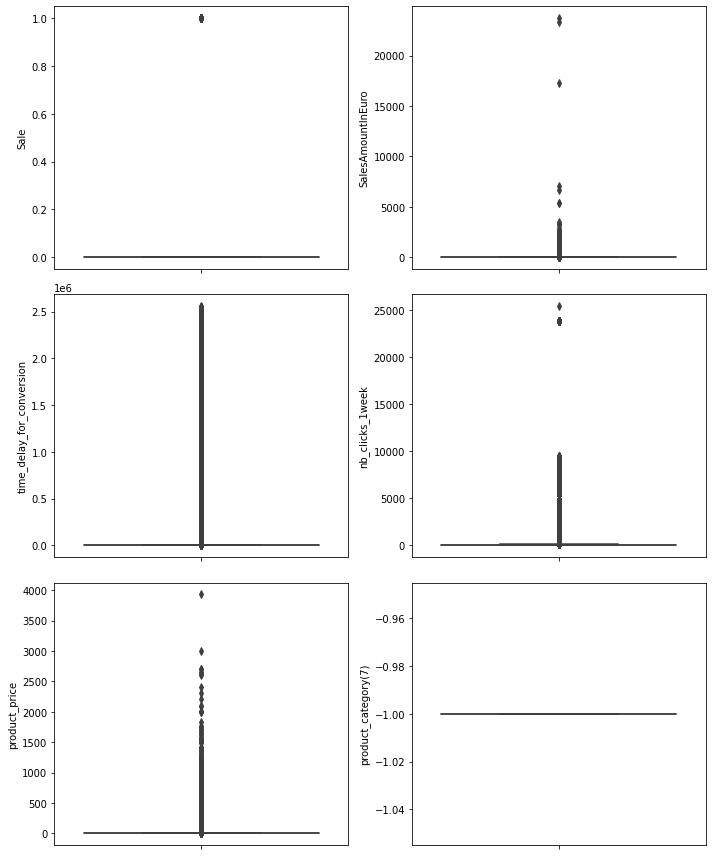

In [ ]:
numericaldf = df.select_dtypes(exclude=['object'])
fig, axes = plt.subplots(3, 2,figsize=(10,12))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= numericaldf.iloc[:,i], ax=ax)
fig.tight_layout();

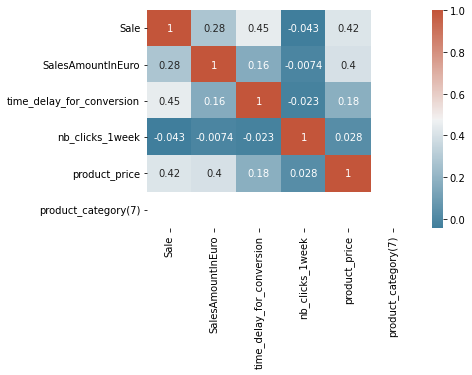

In [ ]:
cmap= sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True,cmap=cmap);

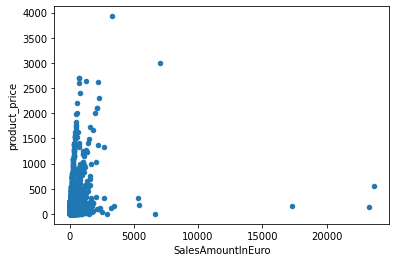

In [ ]:
df.plot(kind='scatter', x='SalesAmountInEuro', y='product_price');

In [ ]:
df[df["Sale"]==1].isnull().sum()

Sale                          0
SalesAmountInEuro             0
time_delay_for_conversion     0
click_timestamp               0
nb_clicks_1week               0
product_price                 0
product_age_group             0
device_type                   0
audience_id                   0
product_gender                0
product_brand                 0
product_category(1)           0
product_category(2)           0
product_category(3)           0
product_category(4)           0
product_category(5)           0
product_category(6)           0
product_category(7)           0
product_country               0
product_id                    0
product_title                44
partner_id                    0
user_id                       0
dtype: int64